# K-Means Clustering

## Importing the libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
dataset = pd.read_csv('Mall_Customers.csv')

In [8]:
from sklearn.preprocessing import LabelBinarizer
Op = LabelBinarizer()
dataset['Genre']= Op.fit_transform(dataset['Genre'])

In [9]:
x = dataset.iloc[:,1:5].values

## Using the elbow method to find the optimal number of clusters

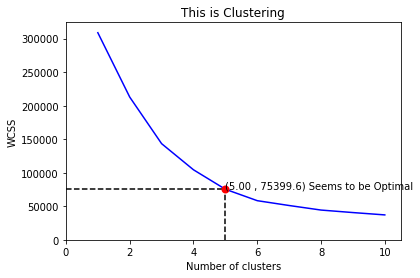

In [156]:
from sklearn.cluster import KMeans
# We Will running on muliple clusters
wcss = []
for i in range(1,11):
    clusters = KMeans(n_clusters = i, random_state = 42)
    clusters.fit(x)
    wcss.append(clusters.inertia_)
plt.plot(range(1,11),wcss,'b')
plt.title('This is Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(5,wcss[4],'.',mew = 4, ms =8,color = 'r')
plt.annotate(xy = [5,wcss[4]],s='(%.2f , %.1f) Seems to be Optimal'%(5,wcss[4]))
plt.vlines(5,0,wcss[4],linestyle='dashed')
plt.hlines(wcss[4],0,5,linestyle='dashed')
plt.xlim(0,None)
plt.ylim(0,None)
plt.show()

## Training the K-Means model on the dataset

In [115]:
clusters = KMeans(n_clusters = 5, random_state = 42)
y_pred = clusters.fit_predict(x)

In [116]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [97]:
clusters.predict([[1,21,20,80]])
trash  = clusters.cluster_centers_[:,-1]
trash = np.append(trash,100)
trash = np.insert(trash,0,0)
dataset['Cluster'] = pd.cut(dataset['Spending Score (1-100)'],
                                           bins = trash)
dataset['Numerical Indicator'] = y_pred

In [119]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Numerical Indicator
0,1,1,19,15,39,"(20.913, 49.57]",4
1,2,1,21,15,81,"(78.565, 82.128]",2
2,3,0,20,16,6,"(0.0, 17.583]",4
3,4,0,23,16,77,"(49.57, 78.565]",2
4,5,0,31,17,40,"(20.913, 49.57]",4


## Visualising the clusters

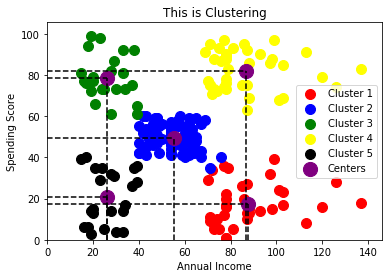

In [141]:
plt.scatter(x[y_pred ==0, 2], x[y_pred == 0, 3], s = 100, c ='red', label='Cluster 1')
plt.scatter(x[y_pred ==1, 2], x[y_pred == 1, 3], s = 100, c ='blue', label='Cluster 2')
plt.scatter(x[y_pred ==2, 2], x[y_pred == 2, 3], s = 100, c ='green', label='Cluster 3')
plt.scatter(x[y_pred ==3, 2], x[y_pred == 3, 3], s = 100, c ='yellow', label='Cluster 4')
plt.scatter(x[y_pred ==4, 2], x[y_pred == 4, 3], s = 100, c ='black', label='Cluster 5')

plt.scatter(clusters.cluster_centers_[:,2],clusters.cluster_centers_[:,3],color='purple', s = 200, label='Centers')

plt.vlines(clusters.cluster_centers_[:,2][0],0,clusters.cluster_centers_[:,3][0],linestyle='dashed')
plt.hlines(clusters.cluster_centers_[:,3][0],0,clusters.cluster_centers_[:,2][0],linestyle='dashed')

plt.vlines(clusters.cluster_centers_[:,2][1],0,clusters.cluster_centers_[:,3][1],linestyle='dashed')
plt.hlines(clusters.cluster_centers_[:,3][1],0,clusters.cluster_centers_[:,2][1],linestyle='dashed')
# plt.annotate(xy = [5,wcss[4]],s='(%.2f , %.1f)'%(5,wcss[4]))

plt.vlines(clusters.cluster_centers_[:,2][2],0,clusters.cluster_centers_[:,3][2],linestyle='dashed')
plt.hlines(clusters.cluster_centers_[:,3][2],0,clusters.cluster_centers_[:,2][2],linestyle='dashed')
# plt.annotate(xy = [5,wcss[4]],s='(%.2f , %.1f)'%(5,wcss[4]))

plt.vlines(clusters.cluster_centers_[:,2][3],0,clusters.cluster_centers_[:,3][3],linestyle='dashed')
plt.hlines(clusters.cluster_centers_[:,3][3],0,clusters.cluster_centers_[:,2][3],linestyle='dashed')
# plt.annotate(xy = [5,wcss[4]],s='(%.2f , %.1f)'%(5,wcss[4]))

plt.vlines(clusters.cluster_centers_[:,2][4],0,clusters.cluster_centers_[:,3][4],linestyle='dashed')
plt.hlines(clusters.cluster_centers_[:,3][4],0,clusters.cluster_centers_[:,2][4],linestyle='dashed')
# plt.annotate(xy = [5,wcss[4]],s='(%.2f , %.1f)'%(5,wcss[4]))

plt.title('This is Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.xlim(0,None)
plt.ylim(0, None)

plt.legend()

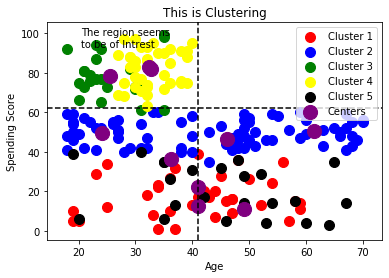

In [163]:
plt.scatter(x[y_pred ==0, 1], x[y_pred == 0, 3], s = 100, c ='red', label='Cluster 1')
plt.scatter(x[y_pred ==1, 1], x[y_pred == 1, 3], s = 100, c ='blue', label='Cluster 2')
plt.scatter(x[y_pred ==2, 1], x[y_pred == 2, 3], s = 100, c ='green', label='Cluster 3')
plt.scatter(x[y_pred ==3, 1], x[y_pred == 3, 3], s = 100, c ='yellow', label='Cluster 4')
plt.scatter(x[y_pred ==4, 1], x[y_pred == 4, 3], s = 100, c ='black', label='Cluster 5')
plt.scatter(clusters.cluster_centers_[:,1],clusters.cluster_centers_[:,3],color='purple', s = 200, label='Centers')
plt.axvline(41,linestyle='--',color='k')
plt.axhline(62,linestyle='--',color='k')
plt.annotate(xy=[20.5,93], s='The region seems\nto be of Intrest')
plt.title('This is Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()